## Quantifying and Reducing Cardinality

Cardinality refers to the number of labels within a categorical variable. A variable like gender has low cardinality because it has only two labels: male and female. Other variables with many labels are said to have high cardinality. 

Things to consider when working with high cardinality:

- Uneven distribution of labels between training and test sets

- May result to overfitting, particularly in tree-based algorithms

- Decreased model performance: high cardinality variables dominate over those with low cardinality

- May lead to errors depending on how the encoder used handles unknown values in the test set.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# TEMPLATE

# Get number of labels in categorical columns 
df[["Col1", "Col2"]].nunique()

# Identify rare labels based on % 
label_freq = df["col"].value_counts() / len(df) * 100
print(label_freq)

# Visualise: red line set to 5% but can be adjusted
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=5, color="red")
fig.set_ylabel("Percentage of occurrence per value")
fig.set_xlabel("Values in Variable_Name")
fig.set_title("Locate Rare Values")
plt.show()

# Reduce cardinality by combining labels 
to_be_replaced = ["value1", "value2"]
df["col"].replace(dict.fromkeys(to_be_replaced, "new value"), inplace=True)

### Let's see the process in action

We will use the titanic dataframe from kaggle and focus on the "Cabin" variable.

In [2]:
# Import titanic df from kaggle
titanic_df = pd.read_csv("...")
titanic_df["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [3]:
# Quantify cardinality 
titanic_df["Cabin"].nunique()

147

How we deal with high cardinality depends on the data. 
Often, we combine rare labels together, but this time we can also remove the cabin number which will make a huge difference.

In [4]:
# Reduce cardinality by removing digits
titanic_df['Cabin'] = titanic_df['Cabin'].str.replace('\d+', '')
titanic_df['Cabin'].value_counts()

C          51
B          36
E          32
D          32
A          15
F           9
B B         7
G           4
C C C       4
C C         4
F G         3
B B B B     2
B B B       2
D D         1
F E         1
T           1
Name: Cabin, dtype: int64

In [5]:
# Fix errors: replace values by first occuring letter
cabin_errors = titanic_df.Cabin[titanic_df["Cabin"].str.contains(r"\D.+", regex = True) == True]

for index in cabin_errors.index:
    titanic_df.loc[index, "Cabin"] = titanic_df.loc[index, "Cabin"][0]
    
titanic_df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [6]:
# Go even further, identify rare labels based on %
label_freq = titanic_df["Cabin"].value_counts() / len(titanic_df) * 100
print(label_freq)

C    6.621773
B    5.274972
D    3.703704
E    3.591470
A    1.683502
F    1.459035
G    0.448934
T    0.112233
Name: Cabin, dtype: float64


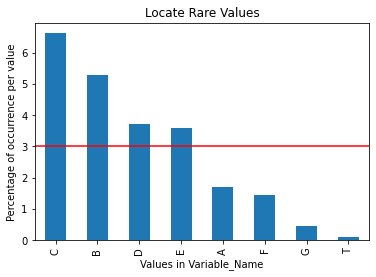

In [7]:
# Visualise: red line set to 3%
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=3, color="red")
fig.set_ylabel("Percentage of occurrence per value")
fig.set_xlabel("Values in Variable_Name")
fig.set_title("Locate Rare Values")
plt.show()

In [8]:
# Reduce cardinality by combining rare labels
to_be_replaced = ["T", "G", "F", "A"]
titanic_df["Cabin"].replace(dict.fromkeys(to_be_replaced, "Other"), inplace=True)
titanic_df["Cabin"].value_counts()

C        59
B        47
Other    33
D        33
E        32
Name: Cabin, dtype: int64